# ***Introduction***

Group 2 (Segmify):
- Adhy Arya Hendrata  
- Daffa Harindah La Fanny Darwin  
- Vicky Eldora Wuisan  

`Problem Statement`:  
The company wants to expand their sales worldwide beside UK since UK is the HQ of the store. therefore they need to expand their franchise in order to increase their sales profit based on their quantity of product sold. 

`Objective`:   
to identify the customer segmentation based on the quantity of product sold by using RFM Analysis and further experiment through machine learning clustering. 


# ***Import Libraries***

these are the packages and libraries that will be used in this task of Team Final Project.

In [1]:
# Import Libraries and Load Data

import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.cm as cm
import re
from matplotlib import pyplot as plt

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ***Data Loading***

This section indicates the beginning process of loading the dataset that about to be deal with. 

In [2]:
# Read the data
df_ori = pd.read_csv('data.csv', encoding='ISO-8859-1')

# duplicate dataset
df = df_ori.copy()

# Display the top 3 rows of the data
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [3]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = df.sample(1, random_state=46)

# menghapus data inference dari df
df.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# menyimpan data_inf to csv
data_inf.to_csv('data_inf.csv')

In [4]:
# Check the shape of the dataset
print(df.shape)

(541908, 8)


In [5]:
# Check the detail information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541908 entries, 0 to 541907
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541908 non-null  object 
 1   StockCode    541908 non-null  object 
 2   Description  540454 non-null  object 
 3   Quantity     541908 non-null  int64  
 4   InvoiceDate  541908 non-null  object 
 5   UnitPrice    541908 non-null  float64
 6   CustomerID   406828 non-null  float64
 7   Country      541908 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

# ***Data Cleaning***

In this section, this is where the data is about to be processed through manipulating the data such as removing the duplicated rows, create a new column from the provided features, remove an unecessary column that does not related to the features that about to be analised. 

In [7]:
# IMV Check
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Check again after drop the IMV

df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [9]:
# Check the duplicated rows in the dataset

df.duplicated().sum()

5268

In [10]:
dateLengths = df.InvoiceDate.str.len()
dateLengths.value_counts()

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")
df["InvoiceDates"] = df["InvoiceDate"].dt.strftime("%m/%d/%Y")
df["InvoiceTime"] = df["InvoiceDate"].dt.strftime("%H:%M")

df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541903    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541904    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541905    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541906    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541907    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541903 2011-12-09 12:50:00       0.85     12680.0          France   
541904 2011-12-09 12:50:00       2.10     12680.0          France   
541905 2011-12-09 12:50:00       4.15     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.95     12680.0          France   

       InvoiceDates InvoiceTime  
0        12/01/2010       08:26  
1        12/01/2010       08:26  
2        12/01/2010       08:26  
3        12/01/2010       08:26  
4        12/01/2010       08:26  
...             ...         ...  
541903   12/09/2011       12:50  
541904   12/09/2011       12:50  
541905   12/09/2011       12:50  
541906   12/09/2011       12:50  
541907   12/09/2011       12:50  

[541908 rows x 10 columns]

In [11]:
# Calculating the TotalPrice per order (UnitPrice and Quantity)
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541903    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541904    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541905    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541906    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541907    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541903 2011-12-09 12:50:00       0.85     12680.0          France   
541904 2011-12-09 12:50:00       2.10     12680.0          France   
541905 2011-12-09 12:50:00       4.15     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.95     12680.0          France   

       InvoiceDates InvoiceTime  TotalPrice  
0        12/01/2010       08:26       15.30  
1        12/01/2010       08:26       20.34  
2        12/01/2010       08:26       22.00  
3        12/01/2010       08:26       20.34  
4        12/01/2010       08:26       20.34  
...             ...         ...         ...  
541903   12/09/2011       12:50       10.20  
541904   12/09/2011       12:50       12.60  
541905   12/09/2011       12:50       16.60  
541906   12/09/2011       12:50       16.60  
541907   12/09/2011       12:50       14.85  

[541908 rows x 11 columns]

In [12]:
df.nunique()

InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
InvoiceDates      305
InvoiceTime       774
TotalPrice       6204
dtype: int64

### ***Category Column addition***

In [13]:
# Create a function that focus on the data cleaning 
def clean_data(df):
    # Remove duplicate rows
    df.drop_duplicates(inplace=True)
    

    # Replace "ID" to "Id" in column names
    df.columns = df.columns.str.replace('ID', 'Id')
    
    # Replace uppercase letters in the middle of words with underscores
    df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True).str.lower()
    
    # Reset index
    df.reset_index(drop=True, inplace=True)

    # Clean string columns
    for col in df.select_dtypes(include=['object']).columns:
        # Remove leading and trailing spaces
        df[col] = df[col].str.strip()

        # Remove special characters and convert to lowercase
        df[col] = df[col].str.replace(r'[\*\?!]', '', regex=True)
        
        # Convert to lowercase
        df[col] = df[col].str.lower()
    return df


def handle_missing_value(df):
    # Calculate the percentage of missing values for each column
    missing_percent = df.isnull().mean() * 100

    # Fill or drop missing values based on percentage
    for col in df.columns:
        if missing_percent[col] > 5:
            if df[col].dtype == 'object':  # Categorical data
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:  # Numerical data
                skewness = df[col].dropna().skew()
                if abs(skewness) < 0.5:  # Normally distributed
                    df[col].fillna(df[col].mean(), inplace=True)
                else:  # Skewed distribution
                    df[col].fillna(df[col].median(), inplace=True)
        else:
            df.dropna(subset=[col], inplace=True)

    return df

# Main data processing
df = clean_data(df)
df = handle_missing_value(df)




C:\Users\Daffa\AppData\Local\Temp\ipykernel_28260\3232660050.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [14]:
# Call the set variable after removal
df.duplicated().sum()

0

In [15]:
# Check again after the IMV has been removed
df.isnull().sum()

invoice_no       0
stock_code       0
description      0
quantity         0
invoice_date     0
unit_price       0
customer_id      0
country          0
invoice_dates    0
invoice_time     0
total_price      0
dtype: int64

In [16]:
# Double check the unique count values in each columns
df.nunique()

invoice_no       24446
stock_code        3848
description       4179
quantity           671
invoice_date     22309
unit_price        1630
customer_id       4373
country             38
invoice_dates      305
invoice_time       774
total_price       6204
dtype: int64

In [17]:
# Double-check each data types after being manipulated
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535186 entries, 0 to 536639
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   invoice_no     535186 non-null  object        
 1   stock_code     535186 non-null  object        
 2   description    535186 non-null  object        
 3   quantity       535186 non-null  int64         
 4   invoice_date   535186 non-null  datetime64[ns]
 5   unit_price     535186 non-null  float64       
 6   customer_id    535186 non-null  float64       
 7   country        535186 non-null  object        
 8   invoice_dates  535186 non-null  object        
 9   invoice_time   535186 non-null  object        
 10  total_price    535186 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 49.0+ MB


In [18]:
df = df.drop(['invoice_date'],axis=1) 
df[['customer_id','quantity']] = df[['customer_id','quantity']].astype(int)
df_grouped = df

In [19]:
# Update the function to handle non-string values
def categorize_description(description):
    if not isinstance(description, str):
        return 'Miscellaneous'
    
    categories = []
    
    # Define the category keywords
    category_keywords = {
        'Candles': ['candles'],
        'Decorations': ['decoration', 'ornament', 'garland','holder','flannel','platter','balloons'],
        'Kitchenware': ['mug', 'plate', 'bowl', 'jampot','cutlery','jars','tea','bottle','container','teacup','tissues','napkins','baking'],
        'Stationery': ['notebook', 'pen', 'pencil', 'paper','sticker','pen'],
        'Toys': ['toy', 'game', 'puzzle','block','children','dolly'],
        'Furniture': ['chair', 'table', 'sofa', 'stool'],
        'Clothing': ['shirt', 'dress', 'trousers', 'sock','woolly'],
        'Electronics': ['lamp', 'light', 'clock'],
        'Accessories': ['bag', 'scarf', 'belt','charm','rucksack','backpack','earrings'],
        'Miscellaneous': ['misc', 'various']
    }
    
    # Lowercase description for case insensitive matching
    description_lower = description.lower()
    
    # Check keywords and assign categories
    for category, keywords in category_keywords.items():
        if any(re.search(r'\b' + keyword + r'\b', description_lower) for keyword in keywords):
            categories.append(category)
        if len(categories) == 2:  # Maximum of 2 categories
            break
    
    if not categories:
        categories.append('Miscellaneous')
    
    return ' '.join(categories)

# Apply the function to the Description column to create the Category column
df_grouped['category'] = df_grouped['description'].apply(categorize_description)

# Display the first few rows with the new Category column
df_grouped

invoice_no stock_code                          description  quantity  \
0          536365     85123a   white hanging heart t-light holder         6   
1          536365      71053                  white metal lantern         6   
2          536365     84406b       cream cupid hearts coat hanger         8   
3          536365     84029g  knitted union flag hot water bottle         6   
4          536365     84029e       red woolly hottie white heart.         6   
...           ...        ...                                  ...       ...   
536635     581587      22613          pack of 20 spaceboy napkins        12   
536636     581587      22899          children's apron dolly girl         6   
536637     581587      23254         childrens cutlery dolly girl         4   
536638     581587      23255      childrens cutlery circus parade         4   
536639     581587      22138         baking set 9 piece retrospot         3   

        unit_price  customer_id         country invoice_dates invoice_time  \
0             2.55        17850  united kingdom    12/01/2010        08:26   
1             3.39        17850  united kingdom    12/01/2010        08:26   
2             2.75        17850  united kingdom    12/01/2010        08:26   
3             3.39        17850  united kingdom    12/01/2010        08:26   
4             3.39        17850  united kingdom    12/01/2010        08:26   
...            ...          ...             ...           ...          ...   
536635        0.85        12680          france    12/09/2011        12:50   
536636        2.10        12680          france    12/09/2011        12:50   
536637        4.15        12680          france    12/09/2011        12:50   
536638        4.15        12680          france    12/09/2011        12:50   
536639        4.95        12680          france    12/09/2011        12:50   

        total_price                 category  
0             15.30  Decorations Electronics  
1             20.34            Miscellaneous  
2             22.00            Miscellaneous  
3             20.34              Kitchenware  
4             20.34                 Clothing  
...             ...                      ...  
536635        10.20              Kitchenware  
536636        12.60                     Toys  
536637        16.60         Kitchenware Toys  
536638        16.60              Kitchenware  
536639        14.85              Kitchenware  

[535186 rows x 11 columns]

In [20]:
# Initialise an empty string with a single space
Category = ' '

# Iterate through each element in the 'category' column of the dataframe 'df_grouped'
for g in df_grouped['category']:
  Category += g+' '

# Split the concatenated string int a list of words, using spaces as delimiters
# Convert the list into a set to remove duplicate values
# Convert the set back into a list
# Slice the list starting from the second element to remove the initial empty string
Category = list(set(Category.split(' ')))[1:]

# Output the final list of unique category values
Category

['Electronics',
 'Clothing',
 'Miscellaneous',
 'Candles',
 'Furniture',
 'Toys',
 'Accessories',
 'Decorations',
 'Kitchenware',
 'Stationery']

In [21]:
# Initialise a list of empty lists, with one empty list for each unique category
gen_desc = [[] for i in range(len(Category))]

# Iterate through each category value in the 'category' column of the Dataframe 'df_grouped'
for dat in df_grouped['category']:
  # Iterate through each unique category and its index
  for i,g in enumerate(Category):
    if g in dat.split(' '):
      gen_desc[i].append(1)
    else:
      gen_desc[i].append(0)

In [22]:
# Create a DataFrame 'gen_mv_dat' from the  transposed array of 'gen_desc' with column names from 'Category'
gen_mv_dat = pd.DataFrame(np.array(gen_desc).T,columns=Category)

# Output the resulting DataFrame 'gen_mv_dat'
gen_mv_dat

Electronics  Clothing  Miscellaneous  Candles  Furniture  Toys  \
0                 1         0              0        0          0     0   
1                 0         0              1        0          0     0   
2                 0         0              1        0          0     0   
3                 0         0              0        0          0     0   
4                 0         1              0        0          0     0   
...             ...       ...            ...      ...        ...   ...   
535181            0         0              0        0          0     0   
535182            0         0              0        0          0     1   
535183            0         0              0        0          0     1   
535184            0         0              0        0          0     0   
535185            0         0              0        0          0     0   

        Accessories  Decorations  Kitchenware  Stationery  
0                 0            1            0           0  
1                 0            0            0           0  
2                 0            0            0           0  
3                 0            0            1           0  
4                 0            0            0           0  
...             ...          ...          ...         ...  
535181            0            0            1           0  
535182            0            0            0           0  
535183            0            0            1           0  
535184            0            0            1           0  
535185            0            0            1           0  

[535186 rows x 10 columns]

In [23]:
# Concatenate the Dataframe 'df_grouped' with 'gen_mv_dat' along columns (axis=1) 
df_grouped_vector = pd.concat([df_grouped,gen_mv_dat],axis=1)

# Drop the 'category' column from the concatenated DataFrame 'df_grouped_vector'
df_grouped_vector = df_grouped_vector.drop(['category'],axis=1)

# Output the resulting DataFrame 'df_grouped_vector'
df_grouped_vector

invoice_no stock_code                          description  quantity  \
0          536365     85123a   white hanging heart t-light holder       6.0   
1          536365      71053                  white metal lantern       6.0   
2          536365     84406b       cream cupid hearts coat hanger       8.0   
3          536365     84029g  knitted union flag hot water bottle       6.0   
4          536365     84029e       red woolly hottie white heart.       6.0   
...           ...        ...                                  ...       ...   
530093        NaN        NaN                                  NaN       NaN   
530097        NaN        NaN                                  NaN       NaN   
530103        NaN        NaN                                  NaN       NaN   
531752        NaN        NaN                                  NaN       NaN   
533308        NaN        NaN                                  NaN       NaN   

        unit_price  customer_id         country invoice_dates invoice_time  \
0             2.55      17850.0  united kingdom    12/01/2010        08:26   
1             3.39      17850.0  united kingdom    12/01/2010        08:26   
2             2.75      17850.0  united kingdom    12/01/2010        08:26   
3             3.39      17850.0  united kingdom    12/01/2010        08:26   
4             3.39      17850.0  united kingdom    12/01/2010        08:26   
...            ...          ...             ...           ...          ...   
530093         NaN          NaN             NaN           NaN          NaN   
530097         NaN          NaN             NaN           NaN          NaN   
530103         NaN          NaN             NaN           NaN          NaN   
531752         NaN          NaN             NaN           NaN          NaN   
533308         NaN          NaN             NaN           NaN          NaN   

        total_price  Electronics  Clothing  Miscellaneous  Candles  Furniture  \
0             15.30          1.0       0.0            0.0      0.0        0.0   
1             20.34          0.0       0.0            1.0      0.0        0.0   
2             22.00          0.0       0.0            1.0      0.0        0.0   
3             20.34          0.0       0.0            0.0      0.0        0.0   
4             20.34          0.0       1.0            0.0      0.0        0.0   
...             ...          ...       ...            ...      ...        ...   
530093          NaN          1.0       0.0            0.0      0.0        0.0   
530097          NaN          1.0       0.0            0.0      0.0        0.0   
530103          NaN          0.0       0.0            1.0      0.0        0.0   
531752          NaN          0.0       0.0            1.0      0.0        0.0   
533308          NaN          0.0       0.0            1.0      0.0        0.0   

        Toys  Accessories  Decorations  Kitchenware  Stationery  
0        0.0          0.0          1.0          0.0         0.0  
1        0.0          0.0          0.0          0.0         0.0  
2        0.0          0.0          0.0          0.0         0.0  
3        0.0          0.0          0.0          1.0         0.0  
4        0.0          0.0          0.0          0.0         0.0  
...      ...          ...          ...          ...         ...  
530093   0.0          0.0          0.0          0.0         0.0  
530097   0.0          0.0          1.0          0.0         0.0  
530103   0.0          0.0          0.0          0.0         0.0  
531752   0.0          0.0          0.0          0.0         0.0  
533308   0.0          0.0          0.0          0.0         0.0  

[536640 rows x 20 columns]

In [24]:
# Check the number of unique values in each column from DataFrame 'df_grouped'
df_grouped.nunique()

invoice_no       24446
stock_code        3848
description       4179
quantity           671
unit_price        1630
customer_id       4372
country             38
invoice_dates      305
invoice_time       774
total_price       6204
category            29
dtype: int64

# ***Exploratory Data Analysis (Before Clustering)***
### 

Exploratory Data Analysis (EDA) is an important first step in the data analysis process, particularly before using clustering methods. EDA aids in understanding the underlying structur eand features of data, identfying trends, detecting anomalies, and verifying assumptions. It lays the groundwork for making informed decisions about data preprocessing and selecting a suitable clustering algorithm. 

In [25]:
df.describe(include = 'O').T

count unique                                 top    freq
invoice_no     535186  24446                              573585    1114
stock_code     535186   3848                              85123a    2368
description    535186   4179  white hanging heart t-light holder    2357
country        535186     38                      united kingdom  488845
invoice_dates  535186    305                          12/05/2011    5290
invoice_time   535186    774                               15:56    2615
category       535186     29                       Miscellaneous  332358

we can analyse that the result of the statistics above indicates the product or item data that is for inventory management that has been launched in the e-commerce based on the dataset. 

In [26]:
#Find out the number of orders for each country separately.
countryMask = df.groupby(['country', 'invoice_no']).size().reset_index(name='order_count')
countryOrder = countryMask.groupby('country').agg(order_count=('order_count', 'count')).sort_values(by='order_count', ascending=False)
print(countryOrder)

                      order_count
country                          
united kingdom              22040
germany                       603
france                        461
eire                          360
belgium                       119
spain                         105
netherlands                   101
switzerland                    74
portugal                       71
australia                      69
italy                          55
finland                        48
sweden                         46
norway                         40
channel islands                33
japan                          28
poland                         24
denmark                        21
cyprus                         20
austria                        19
hong kong                      15
unspecified                    13
singapore                      10
malta                          10
israel                          9
usa                             7
iceland                         7
canada        

Now that are the list of the country that has the most order count based on the customer's purchase. We can analyse simply that the UK has the most order count since the e-commerce based on the UK even though it launches abroad outside UK with the top 5 after UK that are: Germany with 603 ordered count, France with 461 ordered count, Eire (Irish Gaelic name for Ireland) with 360 ordered count, and Belgium with 119 ordered count-- with the least ordered count is for Brazil following by RSA (Republic of South Africa), and Lebanon with 1 ordered count. 

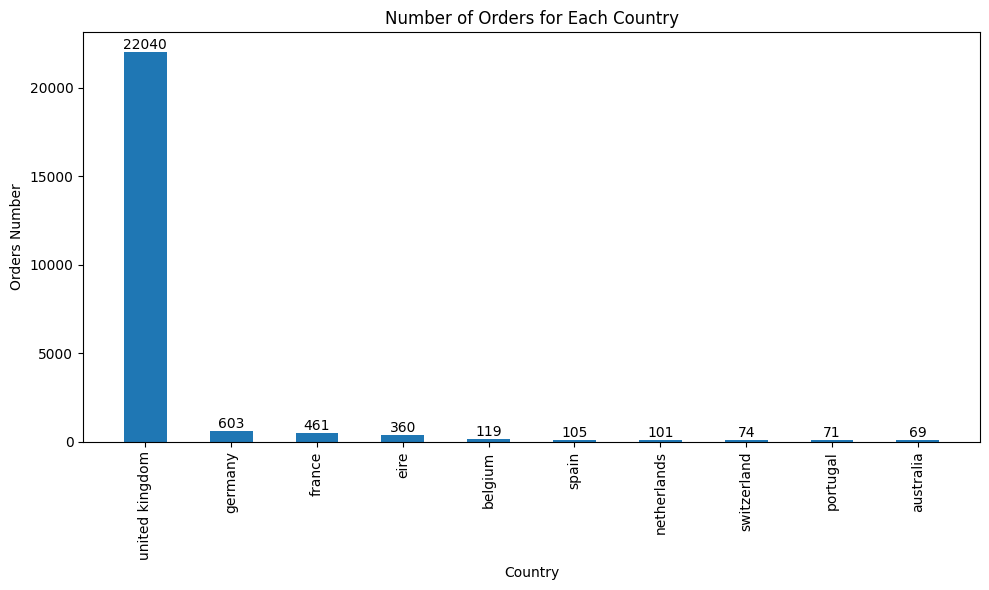

In [27]:
# Sort the DataFrame by 'order_count'in descending order and select the top 10
top10Countries = countryOrder.sort_values(by='order_count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
barWidth = 0.5

# Depict the plot
plt.bar(np.arange(len(top10Countries.index)), top10Countries['order_count'], width=barWidth)

for i, value in enumerate(top10Countries['order_count']):
  plt.text(i, value+1, str(value), ha='center', va='bottom')

# Title & Label
plt.title('Number of Orders for Each Country')
plt.xlabel('Country')
plt.ylabel('Orders Number')

plt.xticks(np.arange(len(top10Countries.index)), top10Countries.index, rotation=90)

plt.tight_layout()
plt.show()

The Vertical Bar Chart above indicates top 10 countries of number of orders, where the UK is the main brand of the e-commerce that reach 22040 as the highest number of orders, following by Germany with 603, France is 401, Eire (Irish Gaelic name of Ireland) 360, and Belgium 119. 

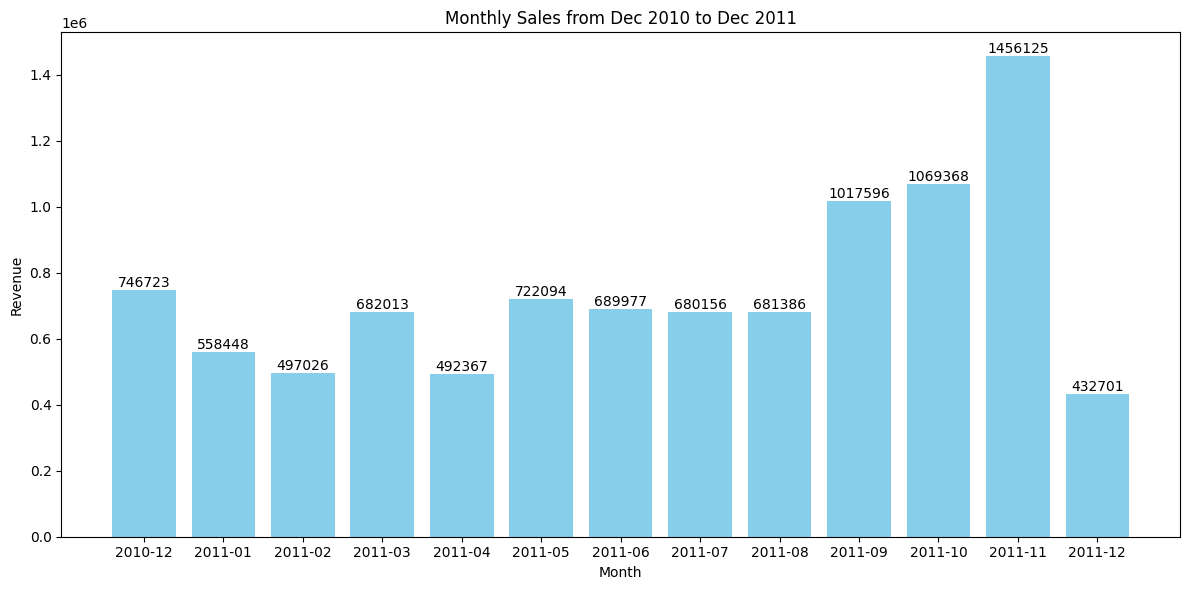

In [28]:
#Find out the total sales per month
df['invoice_dates'] = pd.to_datetime(df['invoice_dates'])
df['Month'] = df['invoice_dates'].dt.to_period('M')
monthlySales = df.groupby('Month')['total_price'].sum()
xLabels = monthlySales.index.strftime('%Y-%m')

plt.figure(figsize=(12, 6))
bars = plt.bar(xLabels, monthlySales, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Monthly Sales from Dec 2010 to Dec 2011')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The Vertical Bar Chart above depicts a monthly sales timeline beginning in December 2010 and ending in December 2011. We can see that monthly sales fluctuated over a year from December 2010 to December 2011, with the highest sales in November 2011 reaching 1456125, while the five months prior to November 2011 kept their sales consistent at 680000 from June to August, then improved in September 2011 (1017596) and October 2011 (1069368). 

Then, in December 2011, sales decreased dramatically because customers had already purchased their needs before Christmas Eve, therefore there was no major improvement in sales in December 2011. 


In [29]:
# Define the Top 10 products
productGrouped = df.groupby('description')
quantityProduct = productGrouped.agg({'quantity':'sum'})
quantityProductTop10 = quantityProduct.nlargest(10, 'quantity')
print(quantityProductTop10)

                                    quantity
description                                 
world war 2 gliders asstd designs      53751
jumbo bag red retrospot                47260
popcorn holder                         36322
assorted colour bird ornament          36282
pack of 72 retrospot cake cases        36016
white hanging heart t-light holder     35298
rabbit night light                     30631
mini paint set vintage                 26437
pack of 12 london tissues              26299
pack of 60 pink paisley cake cases     24719


The result displays the top ten product descriptions by number sold, with "world war 2 gliders asstd designs" leading with 53,751 units, followed by "jumbo bag red retrospot" with 47,260 units. Other popular items include "popcorn holder," "assorted colour bird ornament," and a variety of decorative and utilitarian things such as cake cases, a heart t-light holder, and a rabbit night light, demonstrating a strong customer desire for themed, vintage, and decorative items.


In [30]:
# Define the Top 10 Top Sale Revenue
topSaleRevenue = productGrouped.agg({'quantity':'sum', 'total_price':'sum'})
topSaleRevenue_top10 = topSaleRevenue.nlargest(10, 'total_price')

print(topSaleRevenue_top10)

                                    quantity  total_price
description                                              
dotcom postage                           707    206245.48
regency cakestand 3 tier               13007    164459.49
white hanging heart t-light holder     35298     99612.42
party bunting                          18010     98243.88
jumbo bag red retrospot                47260     92175.79
rabbit night light                     30631     66661.63
postage                                 3003     66230.64
paper chain kit 50's christmas         18876     63715.24
assorted colour bird ornament          36282     58792.42
chilli lights                          10225     53746.66


The output displays the top 10 product descriptions based on quantity and total sales value. Despite a tiny number of 707, "dotcom postage" generates the most overall revenue at $206,245.48, showing significant shipping expenses. Popular products include the "regency cakestand 3 tier" with 13,007 units sold, producing $164,459.49, and the "white hanging heart t-light holder" with 35,298 units sold for $99,612.42. Other popular items, such as "party bunting," "jumbo bag red retrospot," and "rabbit night light," contribute significantly to income, demonstrating a demand for both ornamental and functional things.

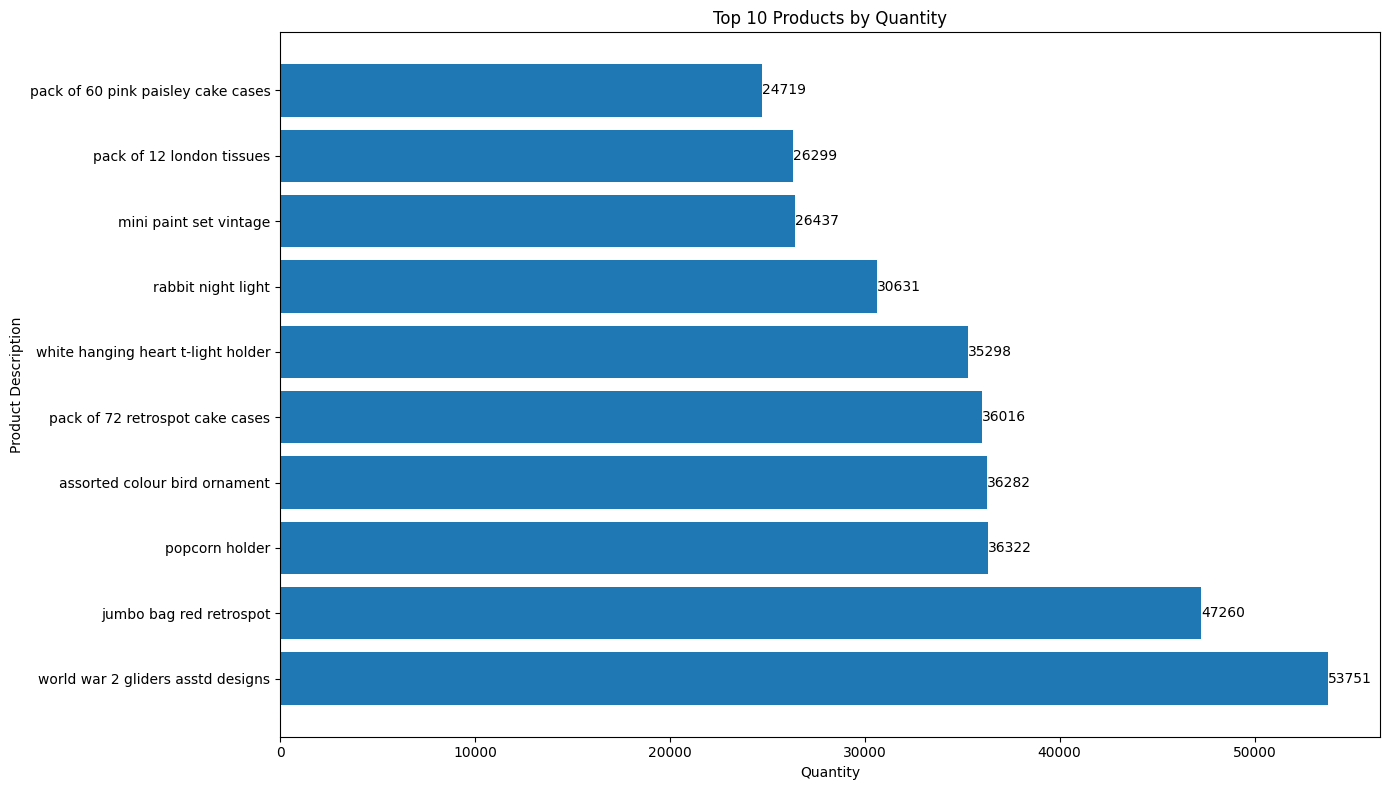

In [31]:
plt.figure(figsize=(14, 8))
plt.barh(quantityProductTop10.index, quantityProductTop10['quantity'])

plt.title('Top 10 Products by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product Description')

for i, value in enumerate(quantityProductTop10['quantity']):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()

Based on the bar graph above is the top ten selling products by amount in the United States. The most popular product is "world war 2 gliders asstd designs" with about 54000 units sold, while the least popular product is "pack of 60 pink paisley cake cases" with approximately 25000 units sold.  


### ***EDA for Customer Segmentation by using RFM Analysis***

RFM analysis classifies customers based on three criteria: recency (R), frequency (F), and monetary value (M). Recency is the number of days since a customer's last transaction, indicating recent purchasing activity. The frequency of a customer's transactions shows their overall purchasing patterns. Finally, Monetary Value denotes the entire amount of money a consumer has spent, indicating their purchasing power and potential value to the company. By analysing these three data, firms may segment their customers and adjust marketing campaigns to their individual purchasing habits.



In [32]:
# Initiate the RFM Analysis

df_grouped_vector.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536640 entries, 0 to 533308
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   invoice_no     535186 non-null  object 
 1   stock_code     535186 non-null  object 
 2   description    535186 non-null  object 
 3   quantity       535186 non-null  float64
 4   unit_price     535186 non-null  float64
 5   customer_id    535186 non-null  float64
 6   country        535186 non-null  object 
 7   invoice_dates  535186 non-null  object 
 8   invoice_time   535186 non-null  object 
 9   total_price    535186 non-null  float64
 10  Electronics    535186 non-null  float64
 11  Clothing       535186 non-null  float64
 12  Miscellaneous  535186 non-null  float64
 13  Candles        535186 non-null  float64
 14  Furniture      535186 non-null  float64
 15  Toys           535186 non-null  float64
 16  Accessories    535186 non-null  float64
 17  Decorations    535186 non-null  fl

In [33]:
# Convert the 'invoice_dates' column to datetime format
df_grouped_vector["invoice_dates"] = pd.to_datetime(df_grouped_vector["invoice_dates"], format="%m/%d/%Y")

# Display the first 5 rows of the updated DataFrame 'df_grouped_vector'
df_grouped_vector.head(5)

invoice_no stock_code                          description  quantity  \
0     536365     85123a   white hanging heart t-light holder       6.0   
1     536365      71053                  white metal lantern       6.0   
2     536365     84406b       cream cupid hearts coat hanger       8.0   
3     536365     84029g  knitted union flag hot water bottle       6.0   
4     536365     84029e       red woolly hottie white heart.       6.0   

   unit_price  customer_id         country invoice_dates invoice_time  \
0        2.55      17850.0  united kingdom    2010-12-01        08:26   
1        3.39      17850.0  united kingdom    2010-12-01        08:26   
2        2.75      17850.0  united kingdom    2010-12-01        08:26   
3        3.39      17850.0  united kingdom    2010-12-01        08:26   
4        3.39      17850.0  united kingdom    2010-12-01        08:26   

   total_price  Electronics  Clothing  Miscellaneous  Candles  Furniture  \
0        15.30          1.0       0.0            0.0      0.0        0.0   
1        20.34          0.0       0.0            1.0      0.0        0.0   
2        22.00          0.0       0.0            1.0      0.0        0.0   
3        20.34          0.0       0.0            0.0      0.0        0.0   
4        20.34          0.0       1.0            0.0      0.0        0.0   

   Toys  Accessories  Decorations  Kitchenware  Stationery  
0   0.0          0.0          1.0          0.0         0.0  
1   0.0          0.0          0.0          0.0         0.0  
2   0.0          0.0          0.0          0.0         0.0  
3   0.0          0.0          0.0          1.0         0.0  
4   0.0          0.0          0.0          0.0         0.0

In [34]:
#Last date available in the df
df_grouped_vector['invoice_dates'].max()

# Create a timestamp for a specific date (1 December, 2010) 
current = pd.Timestamp(datetime(2010, 12, 1))

# Print the created timestamp
print(current)

2010-12-01 00:00:00


In [35]:
# Check the data types in detail
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535186 entries, 0 to 536639
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   invoice_no     535186 non-null  object        
 1   stock_code     535186 non-null  object        
 2   description    535186 non-null  object        
 3   quantity       535186 non-null  int32         
 4   unit_price     535186 non-null  float64       
 5   customer_id    535186 non-null  int32         
 6   country        535186 non-null  object        
 7   invoice_dates  535186 non-null  datetime64[ns]
 8   invoice_time   535186 non-null  object        
 9   total_price    535186 non-null  float64       
 10  category       535186 non-null  object        
 11  Month          535186 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int32(2), object(6), period[M](1)
memory usage: 65.1+ MB


In [36]:
# Group the data by 'customer_id' and calculate RFM Scores
RFMScore = df_grouped_vector.groupby('customer_id').agg({'invoice_dates': lambda x: (current - x.max()).days, # Recency: Number of days since the last purchase
                                            'invoice_no': lambda x: x.count(), # Frequency: Number of purchases made by the customer
                                            'total_price': lambda x: x.sum() # Monetary: Total amount spent by the customer
                                            })

# Display the DataFrame 'RFMScore'
RFMScore

invoice_dates  invoice_no  total_price
customer_id                                        
12346.0                -48           2         0.00
12347.0               -371         182      4310.00
12348.0               -298          31      1797.24
12349.0               -355          73      1757.55
12350.0                -63          17       334.40
...                    ...         ...          ...
18280.0                -96          10       180.60
18281.0               -193           7        80.82
18282.0               -366          13       176.60
18283.0               -370         721      2045.53
18287.0               -331          70      1837.28

[4372 rows x 3 columns]

In [37]:
# Renaming the columns for better understanding of RFM
RFMScore.rename(columns={'invoice_dates':'Recency','invoice_no':'Frequency','total_price':'Monetary'},inplace = True)

In [38]:
# Reset the index of the RFM score DataFrame
RFMScore.reset_index()

customer_id  Recency  Frequency  Monetary
0         12346.0      -48          2      0.00
1         12347.0     -371        182   4310.00
2         12348.0     -298         31   1797.24
3         12349.0     -355         73   1757.55
4         12350.0      -63         17    334.40
...           ...      ...        ...       ...
4367      18280.0      -96         10    180.60
4368      18281.0     -193          7     80.82
4369      18282.0     -366         13    176.60
4370      18283.0     -370        721   2045.53
4371      18287.0     -331         70   1837.28

[4372 rows x 4 columns]

In [39]:
# Display the statistics of the DataFrame 'RFMScore'
RFMScore.describe()

Recency      Frequency      Monetary
count  4372.000000    4372.000000  4.372000e+03
mean   -281.432068     122.412168  2.224608e+03
std     100.780379    2034.113775  2.338830e+04
min    -373.000000       1.000000 -4.287630e+03
25%    -357.000000      17.000000  2.917950e+02
50%    -323.000000      41.000000  6.440700e+02
75%    -230.000000      99.250000  1.608335e+03
max       0.000000  133733.000000  1.449727e+06

In [40]:
# Extract the quantiles of R, F, and M
quantiles = RFMScore.quantile(q=[0.25,0.50,0.75])

# Display the quantile values
print(quantiles)

      Recency  Frequency  Monetary
0.25   -357.0      17.00   291.795
0.50   -323.0      41.00   644.070
0.75   -230.0      99.25  1608.335


In [41]:
# Converting to dictionary format
quantiles = quantiles.to_dict()

# Display after conversion
quantiles

{'Recency': {0.25: -357.0, 0.5: -323.0, 0.75: -230.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'Monetary': {0.25: 291.795, 0.5: 644.0699999999999, 0.75: 1608.335}}

In [42]:
# Creating a function to group the customers into 4 based on Recency value
'''
x = value
p = recency, monetary, frequency
d = quartiles dict
d[p][0.25] retrieves the value of p from dict d using the indices [0.25], [0.5], and [0.75]
Recency: the closer the last transaction, the better
'''

def RecencyScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

`x` is assigned a value, while `p` stands for the parameters ***recency***, ***monetary***, and ***frequency***. The variable `d` is a dictionary holding quartile values for various factors. The expression `d[p][0.25]` fetches the value of parameter 'p' from the dictionary `d` via the quartile index `[0.25]`. In the context supplied, ***recency*** refers to the time passed since the last transaction, with a lower value indicating a more recent transaction, which is deemed desirable.


In [43]:
# Creating a function to group the customers into 4 based on Frequency and Monetary values
# Frequency and Monetary: The greater the frequency of transactions and the total transaction amount, the better.

def FreqMonetScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

RFMScore.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [44]:
# Applying the created function on the respective columns
# Recency_Score(x,p,d):
# x = value
# p = recency, monetary_value, frequency
# d = quartiles dict
RFMScore['R'] = RFMScore['Recency'].apply(RecencyScore, args = ('Recency',quantiles))
RFMScore['F'] = RFMScore['Frequency'].apply(FreqMonetScore, args = ('Frequency',quantiles))
RFMScore['M'] = RFMScore['Monetary'].apply(FreqMonetScore, args = ('Monetary',quantiles))

# Display the DataFrame of RFM
RFMScore

Recency  Frequency  Monetary  R  F  M
customer_id                                       
12346.0          -48          2      0.00  4  4  4
12347.0         -371        182   4310.00  1  1  1
12348.0         -298         31   1797.24  3  3  1
12349.0         -355         73   1757.55  2  2  1
12350.0          -63         17    334.40  4  4  3
...              ...        ...       ... .. .. ..
18280.0          -96         10    180.60  4  4  4
18281.0         -193          7     80.82  4  4  4
18282.0         -366         13    176.60  1  4  4
18283.0         -370        721   2045.53  1  1  1
18287.0         -331         70   1837.28  2  2  1

[4372 rows x 6 columns]

In [45]:
#Creating a new field 'RFMValue' to split the customers into 10 segments
RFMScore['RFMValue'] = RFMScore[['R','F','M']].sum(axis = 1)
RFMScore['RFMGroup'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)
RFMScore['RFMGroup'] = RFMScore['RFMGroup'].astype(int)
RFMScore.reset_index()

customer_id  Recency  Frequency  Monetary  R  F  M  RFMValue  RFMGroup
0         12346.0      -48          2      0.00  4  4  4        12       444
1         12347.0     -371        182   4310.00  1  1  1         3       111
2         12348.0     -298         31   1797.24  3  3  1         7       331
3         12349.0     -355         73   1757.55  2  2  1         5       221
4         12350.0      -63         17    334.40  4  4  3        11       443
...           ...      ...        ...       ... .. .. ..       ...       ...
4367      18280.0      -96         10    180.60  4  4  4        12       444
4368      18281.0     -193          7     80.82  4  4  4        12       444
4369      18282.0     -366         13    176.60  1  4  4         9       144
4370      18283.0     -370        721   2045.53  1  1  1         3       111
4371      18287.0     -331         70   1837.28  2  2  1         5       221

[4372 rows x 9 columns]

##### ***RFM Visualisation***

After we have calculated customer segmentation using RFM Analysis, we would like to visualise it into four sorts of consumers based on their behaviour, because ***frequency*** and ***monetary*** value affect a customer's lifetime value, and recency affects retention, a measure of engagement. 


In [46]:
# Define customer levels
CustomerLevel = ['Platinum','Diamond','Gold','Silver']

# Perform quantile-based discretisation on RFM values and assign customer levels
scoreCuts = pd.qcut(RFMScore.RFMValue, q=4, labels=CustomerLevel)
RFMScore['Customer_Level'] = scoreCuts.values

# Reset the index of the RFM score DataFrame
RFMScore = RFMScore.reset_index()

# Display the DataFrame of RFMScore
RFMScore

customer_id  Recency  Frequency  Monetary  R  F  M  RFMValue  RFMGroup  \
0         12346.0      -48          2      0.00  4  4  4        12       444   
1         12347.0     -371        182   4310.00  1  1  1         3       111   
2         12348.0     -298         31   1797.24  3  3  1         7       331   
3         12349.0     -355         73   1757.55  2  2  1         5       221   
4         12350.0      -63         17    334.40  4  4  3        11       443   
...           ...      ...        ...       ... .. .. ..       ...       ...   
4367      18280.0      -96         10    180.60  4  4  4        12       444   
4368      18281.0     -193          7     80.82  4  4  4        12       444   
4369      18282.0     -366         13    176.60  1  4  4         9       144   
4370      18283.0     -370        721   2045.53  1  1  1         3       111   
4371      18287.0     -331         70   1837.28  2  2  1         5       221   

     Customer_Level  
0            Silver  
1          Platinum  
2           Diamond  
3          Platinum  
4            Silver  
...             ...  
4367         Silver  
4368         Silver  
4369           Gold  
4370       Platinum  
4371       Platinum  

[4372 rows x 10 columns]

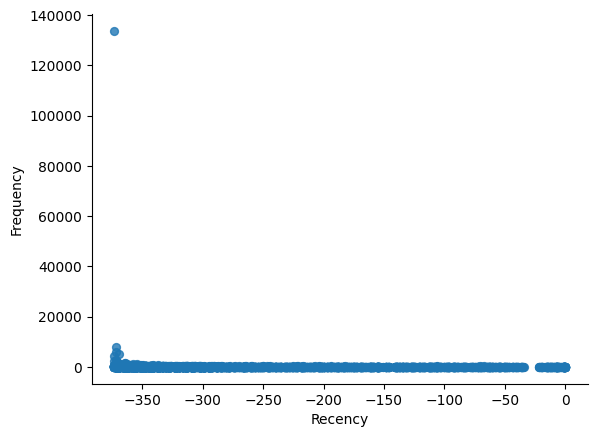

In [47]:
# @title Recency vs Frequency

RFMScore.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

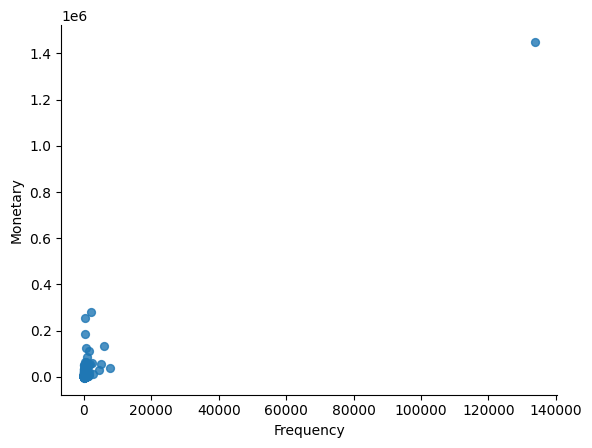

In [48]:
# @title Frequency vs Monetary

RFMScore.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [49]:
# Displaying the number of customers in each group
customerGroup = RFMScore['Customer_Level'].value_counts().sort_values()

# Call the set variable
customerGroup

Customer_Level
Silver       781
Gold         985
Platinum    1281
Diamond     1325
Name: count, dtype: int64

C:\Users\Daffa\AppData\Local\Temp\ipykernel_28260\1017455149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=customerGroup.index, y=customerGroup.values, palette="Set2")


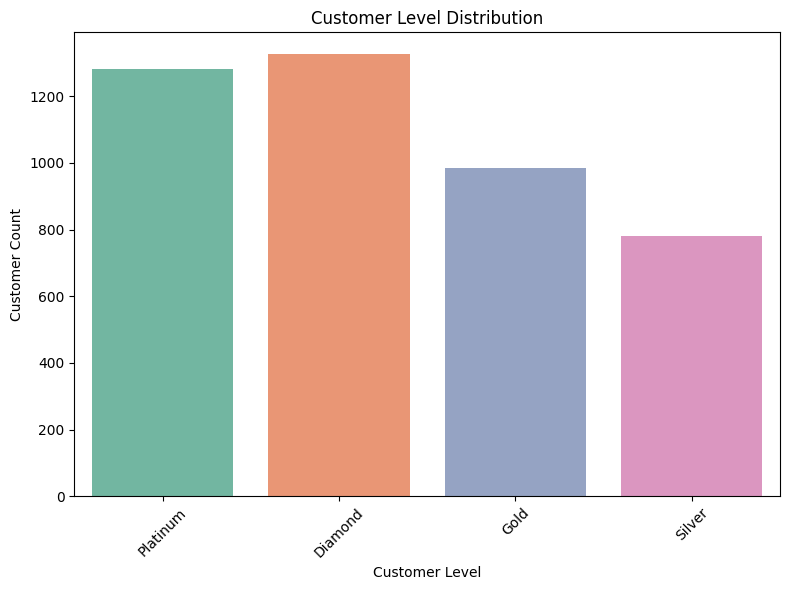

In [50]:
#Displaying the customer groups and their counts in a barchart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=customerGroup.index, y=customerGroup.values, palette="Set2")

plt.title('Customer Level Distribution')
plt.xlabel('Customer Level')
plt.ylabel('Customer Count')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The graph above depicts the percentage of consumers categorised into different tiers, most likely based on their importance to the firm.  The biggest percentage of consumers are in the "Diamond" category, followed by "Platinum" and "Silver" with the fewest customers.  This implies a pyramid structure in which a vast section of the customer base produces a lower portion of total revenue, while a smaller, elite group of customers ("Diamond") contribute a considerably larger share. 

# DRAFTCODE 

In [51]:
# df_grouped_final = df_grouped_vector.groupby(['Customer_Level'])[Category].mean()
# df_grouped_final

In [52]:
# def get_top_3_categories(customer_level):
#     if customer_level in df_grouped_final.index:
#         top_3 = df_grouped_final.loc[customer_level].nlargest(3)
#         return top_3.index.tolist()


In [53]:
# a = 'Diamond'
# if a == 'Diamond':
#     print(f'Top 3 for {a}: {get_top_3_categories("Diamond")}')
# elif a == 'Gold':
#     print(f'Top 3 for {a}: {get_top_3_categories("Gold")}')
# elif a == 'Platinum':
#     print(f'Top 3 for {a}: {get_top_3_categories("Platinum")}')
# elif a == 'Silver':
#     print(f'Top 3 for {a}: {get_top_3_categories("Silver")}')
# else:
#     print('Customer level not found.')

# DRAFTCODE STOPS HERE

### ***Feature Engineering***

Feature engineering in clustering focuses on optimising the features used by clustering algorithms to uncover meaningful patterns from data. To improve clustering performance, actions like as scaling, missing value management, and variable transformation are performed. Feature engineering tries to improve the accuracy and interpretability of clustering results through feature selection, creation, or transformation, allowing for greater insights and decision-making.


##### ***Handling Outlier***

Outlier handling in feature engineering entails detecting and managing data points that differ significantly from the rest of the dataset. By recognising and dealing with outliers, we hope to ensure that clustering algorithms capture significant patterns while minimising the impact of noise or anomalies. Outliers can be removed, transformed, or assigned to appropriate clusters using various techniques. Effective outlier treatment improves clustering findings, resulting in more accurate and dependable insights from the data.


In [54]:
# Check the shape of the DataFrame 'RFMScore'
print(RFMScore.shape)

(4372, 10)


In [55]:
# Prepare the normal, skew, and extreme for handling outliers
normal = []
skew = []
extreme = []

# Call looping
for i in RFMScore.columns.to_list():
    if RFMScore[i].nunique()>4:
        skewness = RFMScore[i].skew()
        if -0.5 < skewness < 0.5:
            normal.append(i)
        elif -1 <= skewness <= -0.5 or 0.5 <= skewness <=1:
            skew.append(i)
        elif skewness < 1 or skewness > 1:
            extreme.append(i)
        
# Display the outliers handle normal ,skew ,extreme
print('normal:', normal)
print('skew:', skew)
print('extreme skew:', extreme)

normal: ['customer_id', 'RFMValue', 'RFMGroup']
skew: []
extreme skew: ['Recency', 'Frequency', 'Monetary']


In [56]:
# Set the variable after adding Winsorizer
RFMScore_winso = RFMScore

In [57]:
winsoriser_extreme = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=extreme)

In [58]:
RFMS_capped = winsoriser_extreme.fit_transform(RFMScore_winso)

Recency - Before Capping


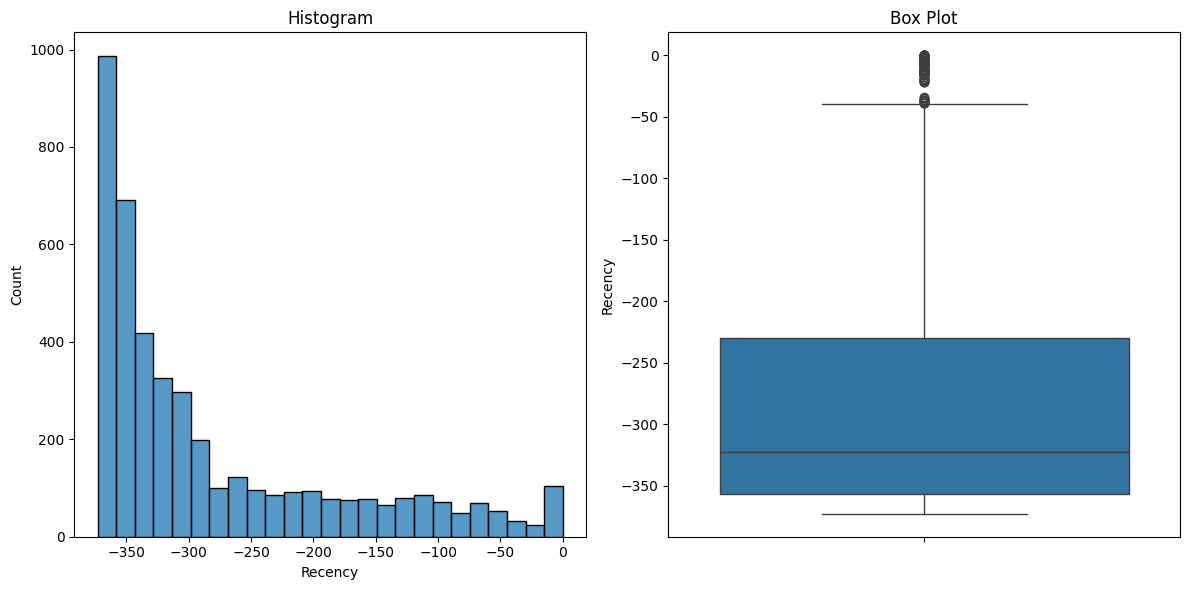


 Recency - After Capping


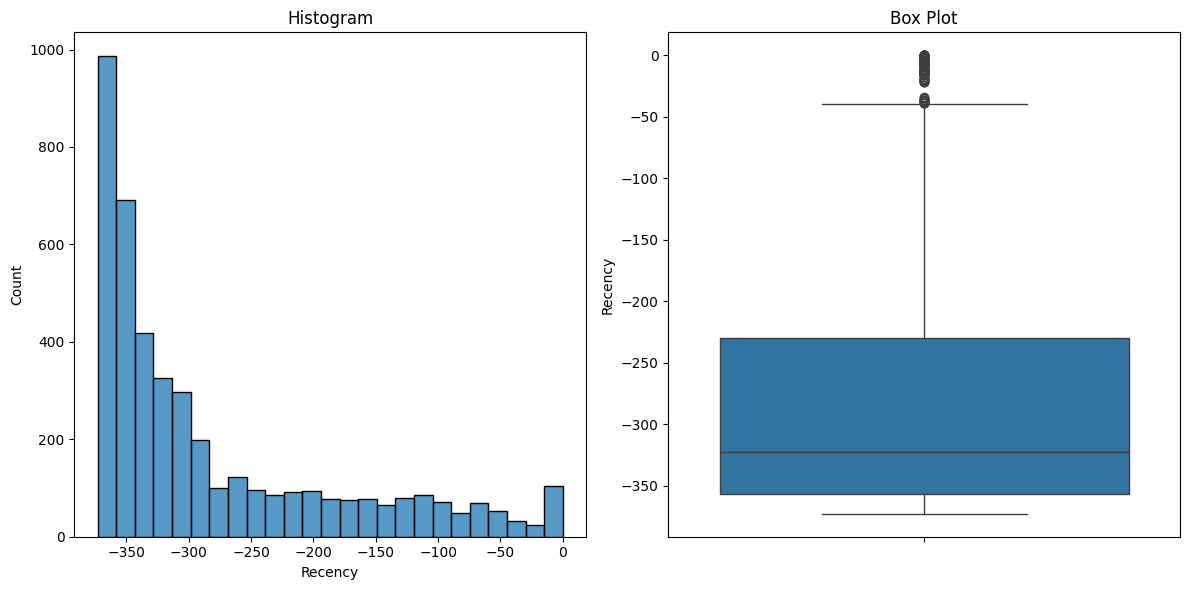

Frequency - Before Capping


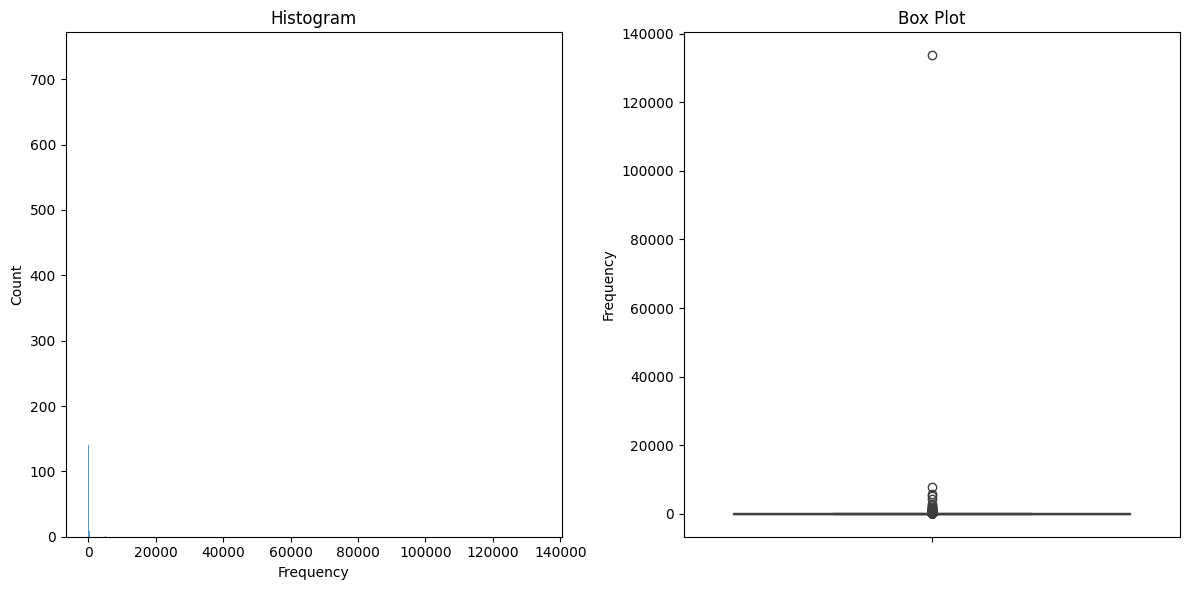


 Frequency - After Capping


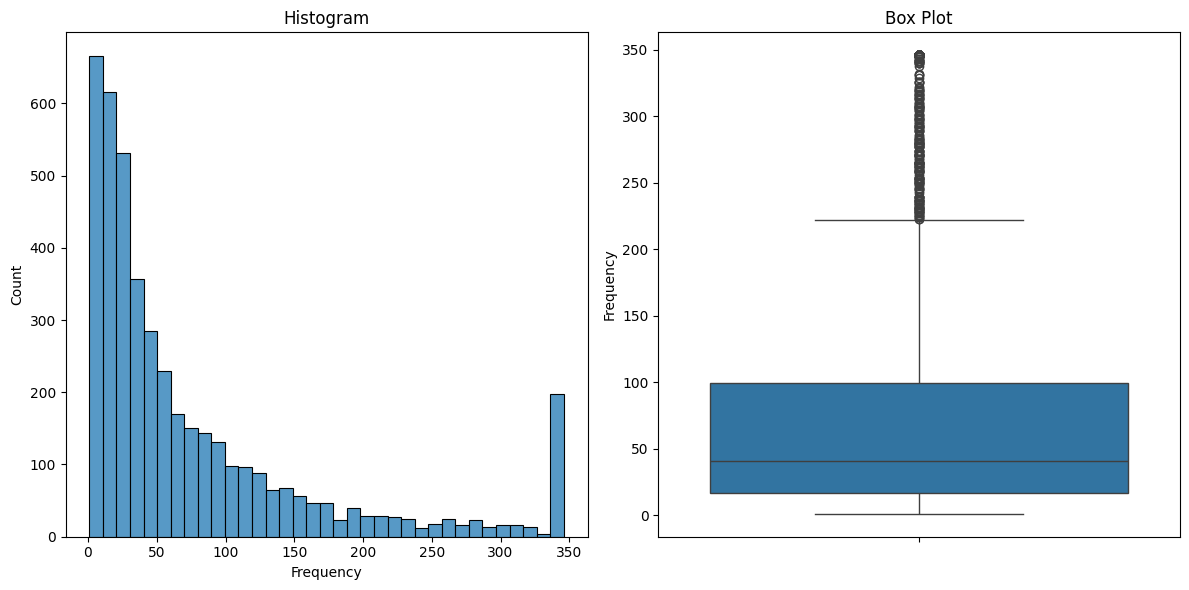

Monetary - Before Capping


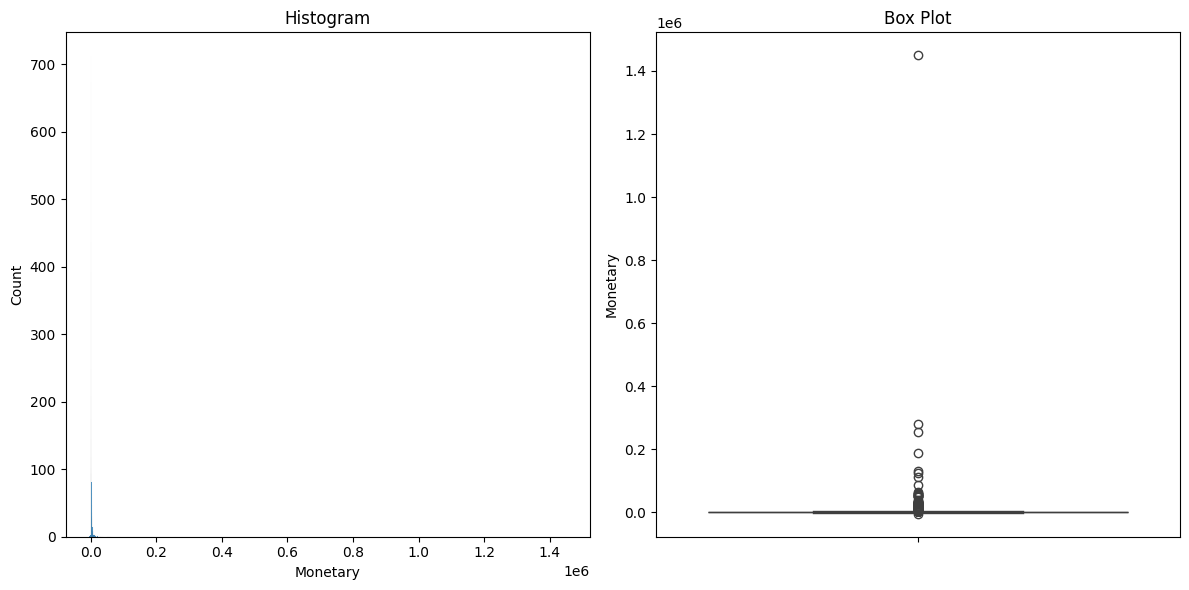


 Monetary - After Capping


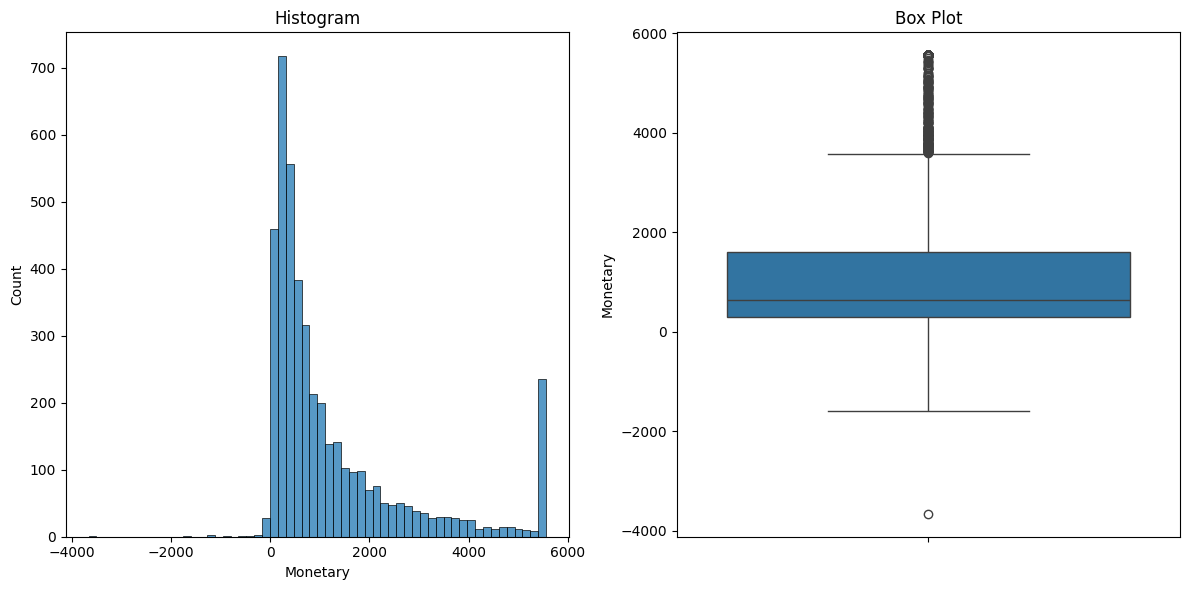

In [59]:
# Check the distribution before and after capping
def diagnostic_plots(RFMScore, feature):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots

    # Histogram
    sns.histplot(RFMScore[feature], ax=axes[0])
    axes[0].set_title('Histogram')

    # Box plot
    sns.boxplot(y=RFMScore[feature], ax=axes[1])
    axes[1].set_title('Box Plot')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
    
    
print('Recency - Before Capping')
diagnostic_plots(RFMScore, 'Recency')

print('\n Recency - After Capping')
diagnostic_plots(RFMS_capped, 'Recency')

print('Frequency - Before Capping')
diagnostic_plots(RFMScore, 'Frequency')

print('\n Frequency - After Capping')
diagnostic_plots(RFMS_capped, 'Frequency')

print('Monetary - Before Capping')
diagnostic_plots(RFMScore, 'Monetary')

print('\n Monetary - After Capping')
diagnostic_plots(RFMS_capped, 'Monetary')

In [60]:
# Splitting numeric columns and categorical columns

num_columns = RFMS_capped.select_dtypes(include=np.number).columns.tolist()
cat_columns = RFMS_capped.select_dtypes(include=['object']).columns.tolist()

RFMS_capped_num =RFMS_capped[num_columns]
RFMS_capped_cat =RFMS_capped[cat_columns]

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['customer_id', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFMValue', 'RFMGroup']
Cat Columns :  []


##### ***Feature Scaling***

In [61]:
# Drop the Column 'Customer_Level' from the DataFrame RMFS_capped
RFMS_capped = RFMS_capped.drop(['Customer_Level'], axis=1)

# Display the DataFrame
RFMS_capped

customer_id  Recency  Frequency  Monetary  R  F  M  RFMValue  RFMGroup
0         12346.0      -48          2      0.00  4  4  4        12       444
1         12347.0     -371        182   4310.00  1  1  1         3       111
2         12348.0     -298         31   1797.24  3  3  1         7       331
3         12349.0     -355         73   1757.55  2  2  1         5       221
4         12350.0      -63         17    334.40  4  4  3        11       443
...           ...      ...        ...       ... .. .. ..       ...       ...
4367      18280.0      -96         10    180.60  4  4  4        12       444
4368      18281.0     -193          7     80.82  4  4  4        12       444
4369      18282.0     -366         13    176.60  1  4  4         9       144
4370      18283.0     -370        346   2045.53  1  1  1         3       111
4371      18287.0     -331         70   1837.28  2  2  1         5       221

[4372 rows x 9 columns]

In [62]:
# Scaling by using StandardScaler
model_scaler = StandardScaler()
model_scaler.fit(RFMS_capped) #.fit() should only be done on train, not test - set
# Do the rescaling process
RFMS_scaled = model_scaler.transform(RFMS_capped)
RFMS_scaled = pd.DataFrame(RFMS_scaled, columns=RFMS_capped.columns)
RFMS_scaled

RFMS_scaled = RFMS_scaled.drop(['RFMValue','RFMGroup'],axis=1)

##### ***Principal Component Analysis***

In [63]:
model_pca = PCA(n_components=0.95)
model_pca.fit(RFMS_scaled)

RFMS_final_pca = model_pca.transform(RFMS_scaled)

Text(0, 0.5, 'Eigenvalues')

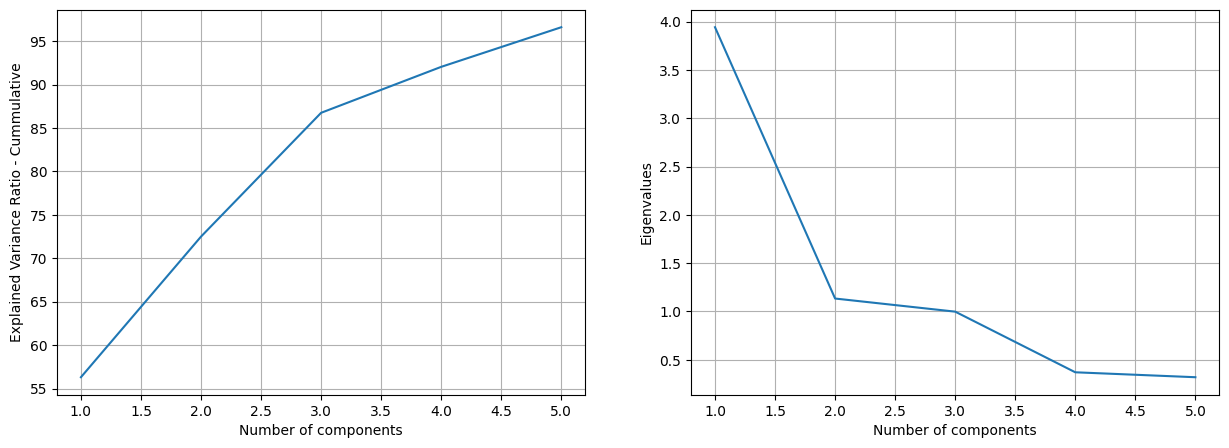

In [64]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(model_pca.explained_variance_ratio_) + 1), np.cumsum(model_pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(model_pca.explained_variance_) + 1), model_pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [65]:
cumsum = np.cumsum(model_pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

5

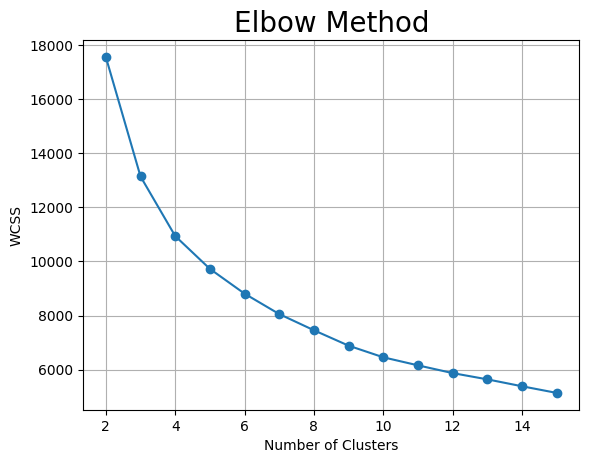

In [66]:
wcss = []
random_state = 17
max_cluster = 15
for i in range(2, max_cluster+1):
    model_km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    model_km.fit(RFMS_final_pca)
    wcss.append(model_km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3454577205269699
For n_clusters = 3 The average silhouette_score is : 0.3055233658421621
For n_clusters = 4 The average silhouette_score is : 0.2793062692997914
For n_clusters = 5 The average silhouette_score is : 0.27821307465703027
For n_clusters = 6 The average silhouette_score is : 0.26357244573018984
For n_clusters = 7 The average silhouette_score is : 0.24889018933790424
For n_clusters = 8 The average silhouette_score is : 0.25382502330331846
For n_clusters = 9 The average silhouette_score is : 0.25222718077289263
For n_clusters = 10 The average silhouette_score is : 0.24802938374565459
For n_clusters = 11 The average silhouette_score is : 0.24702008945935142
For n_clusters = 12 The average silhouette_score is : 0.24233535498930617
For n_clusters = 13 The average silhouette_score is : 0.24495370111747378
For n_clusters = 14 The average silhouette_score is : 0.24620883478953035


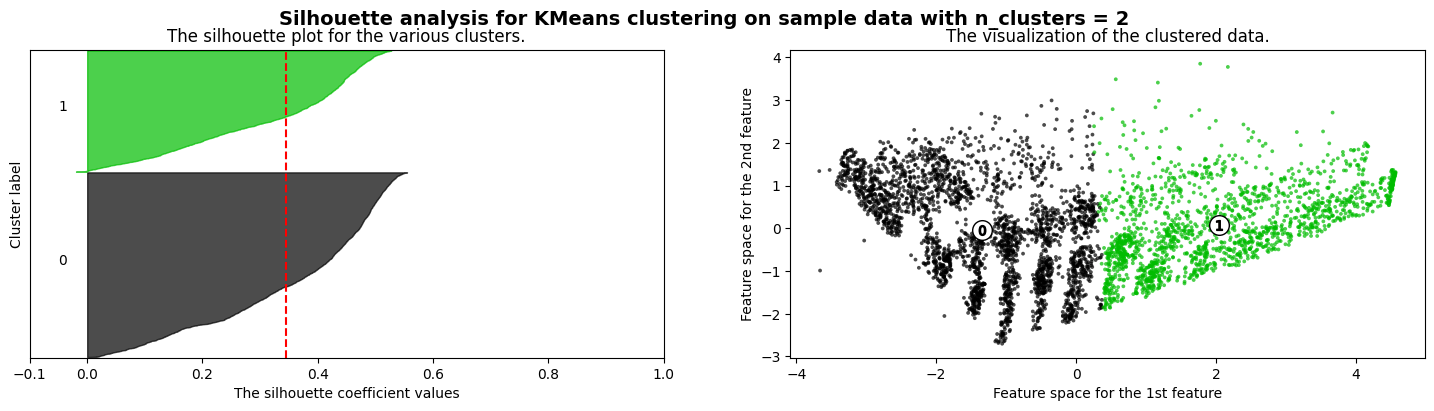

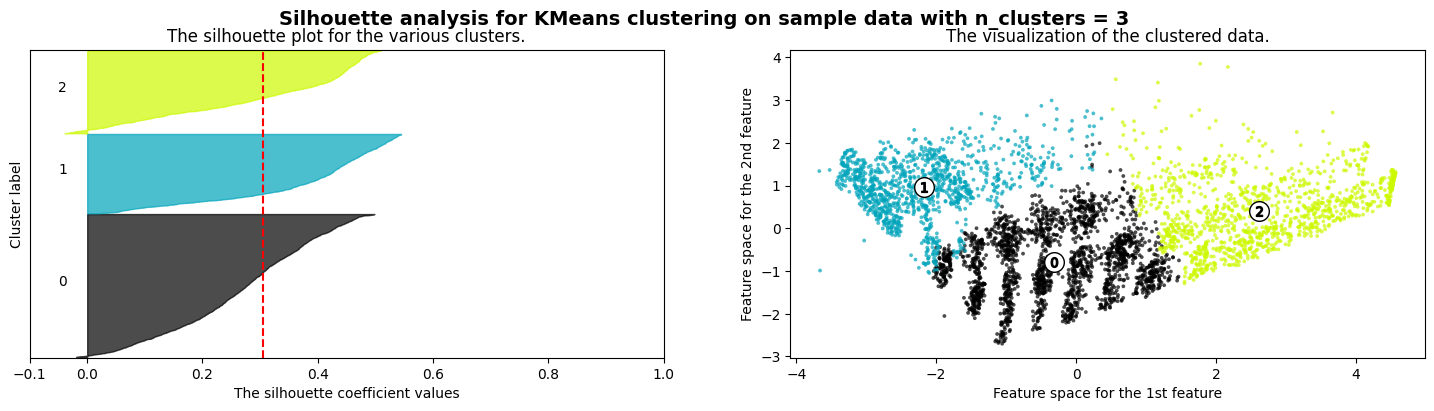

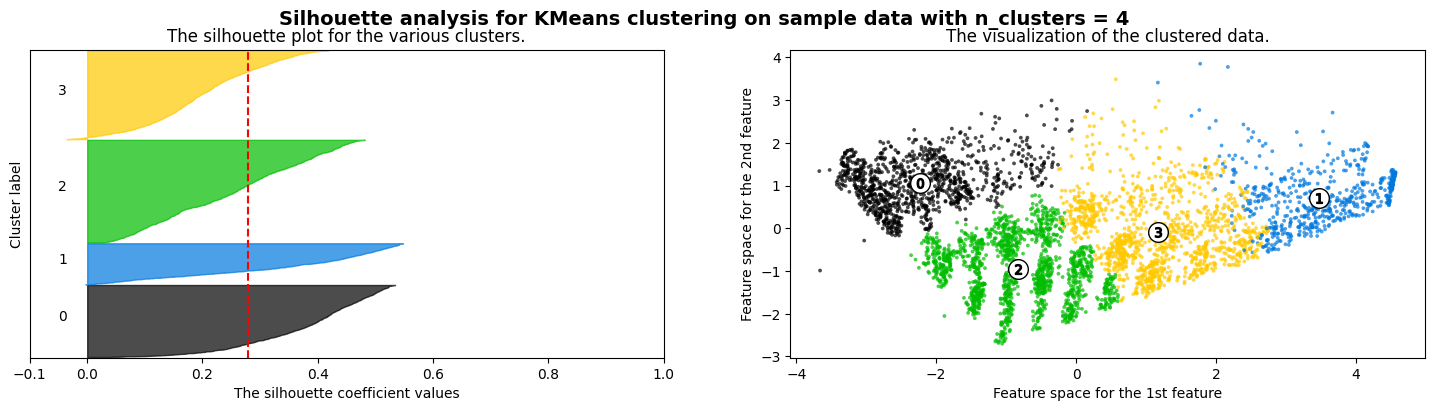

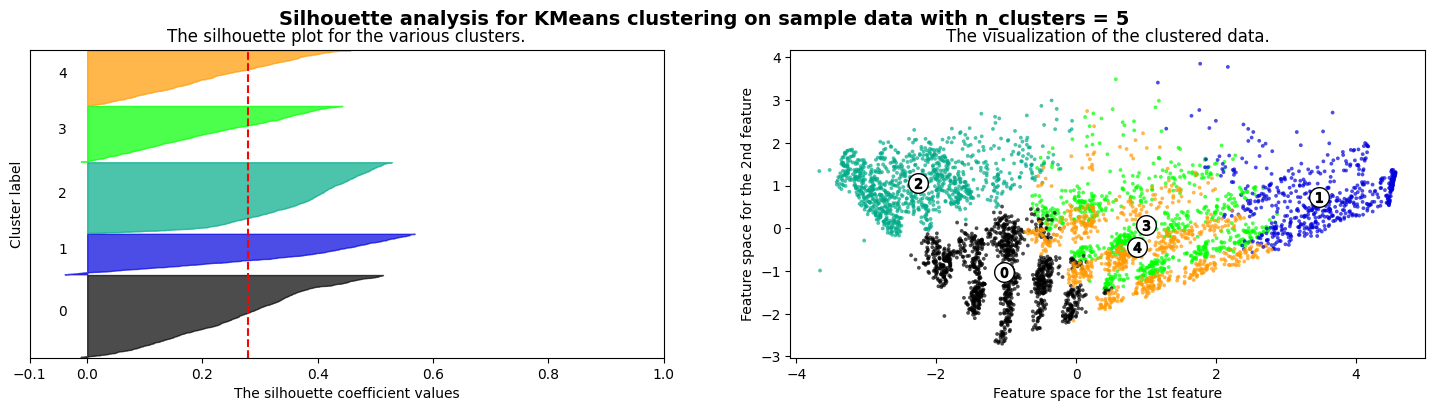

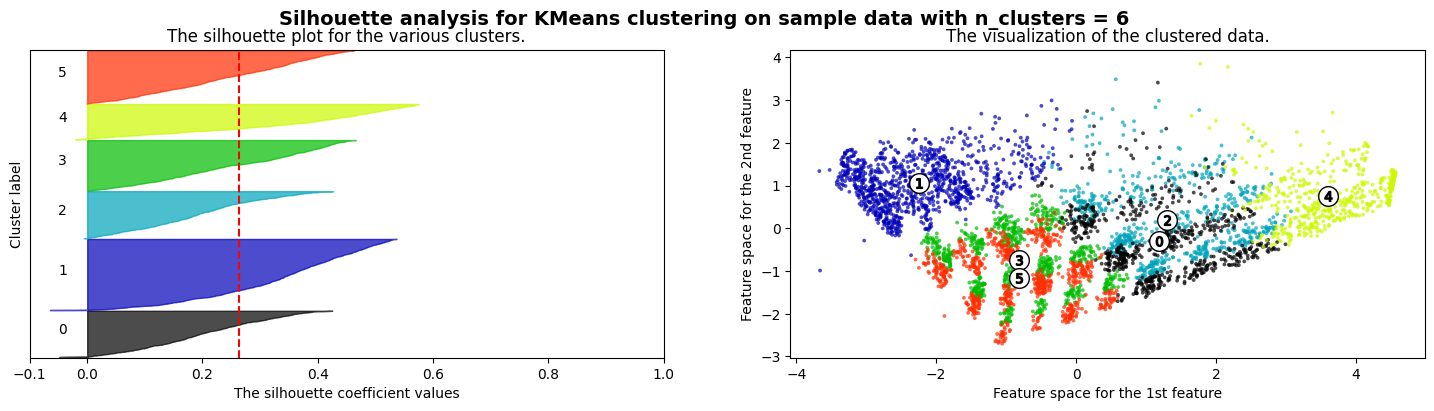

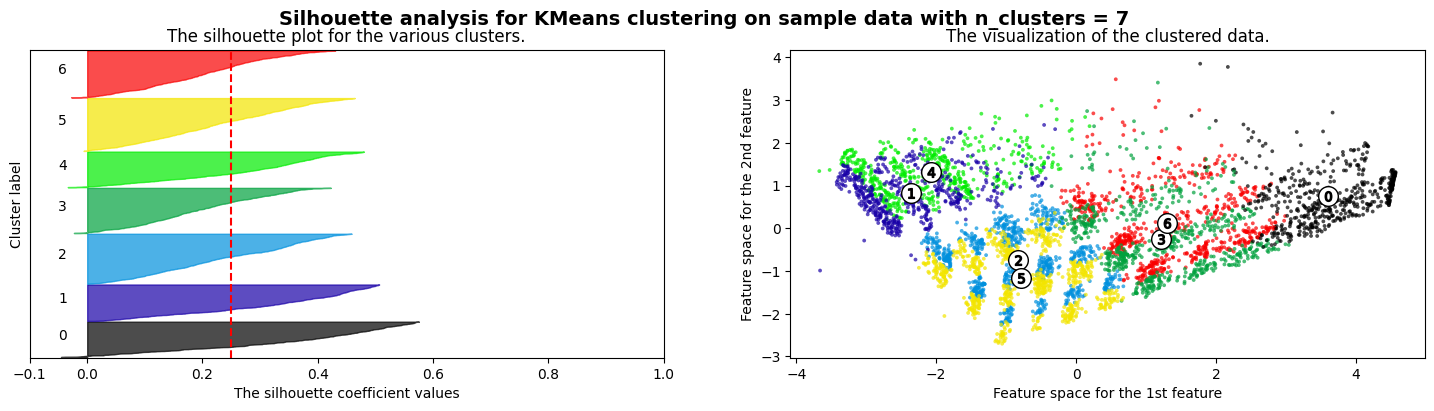

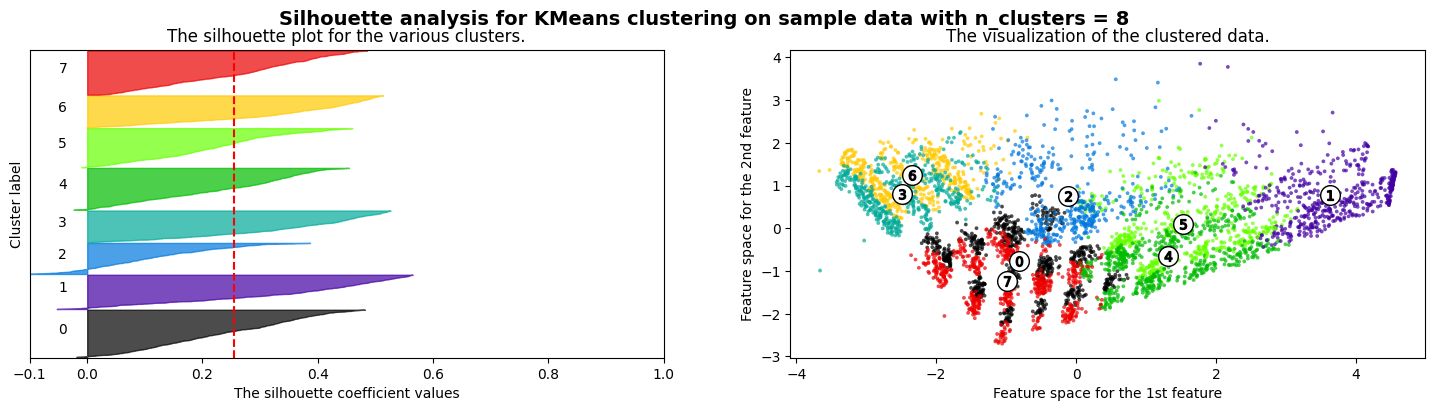

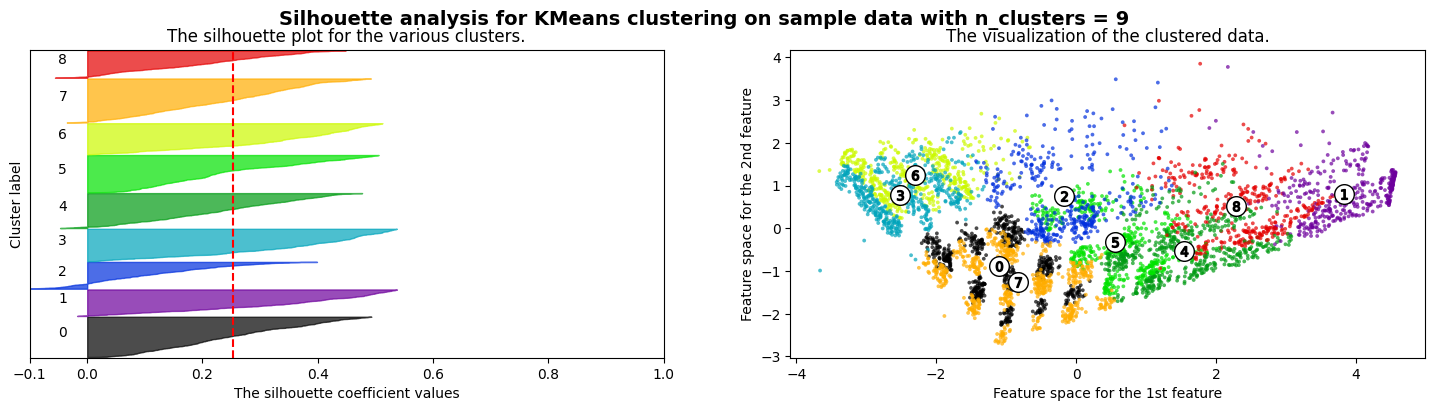

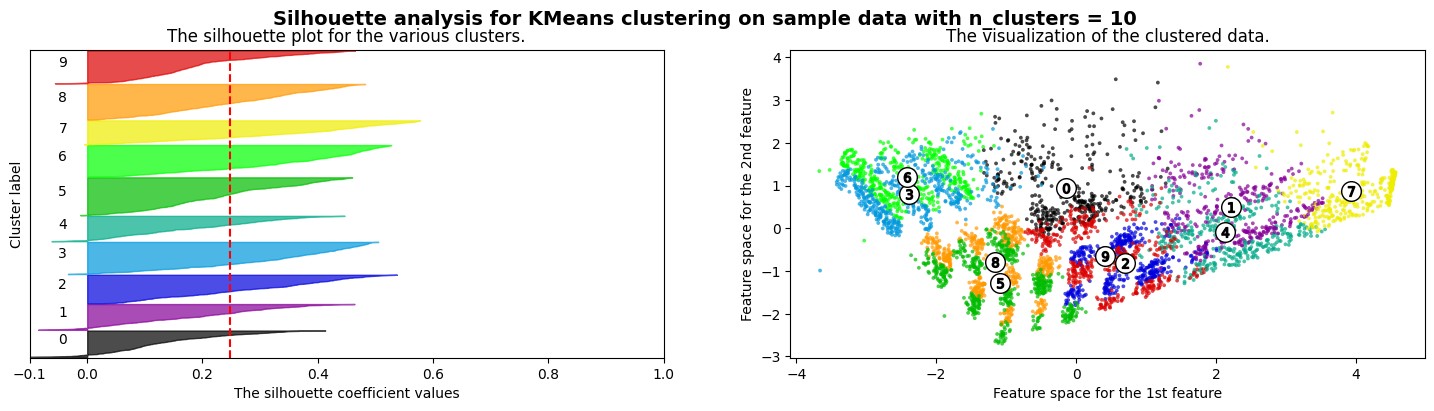

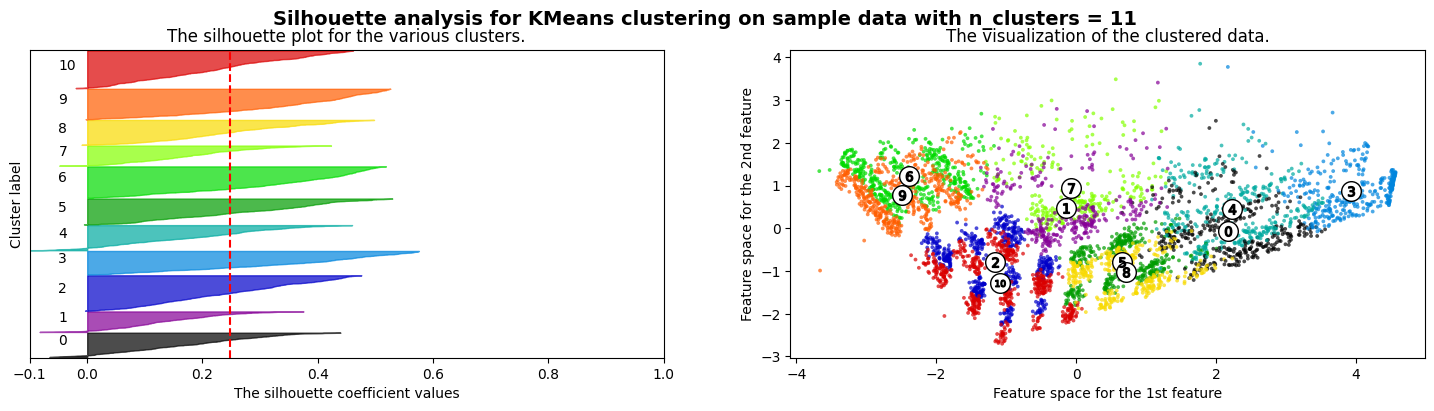

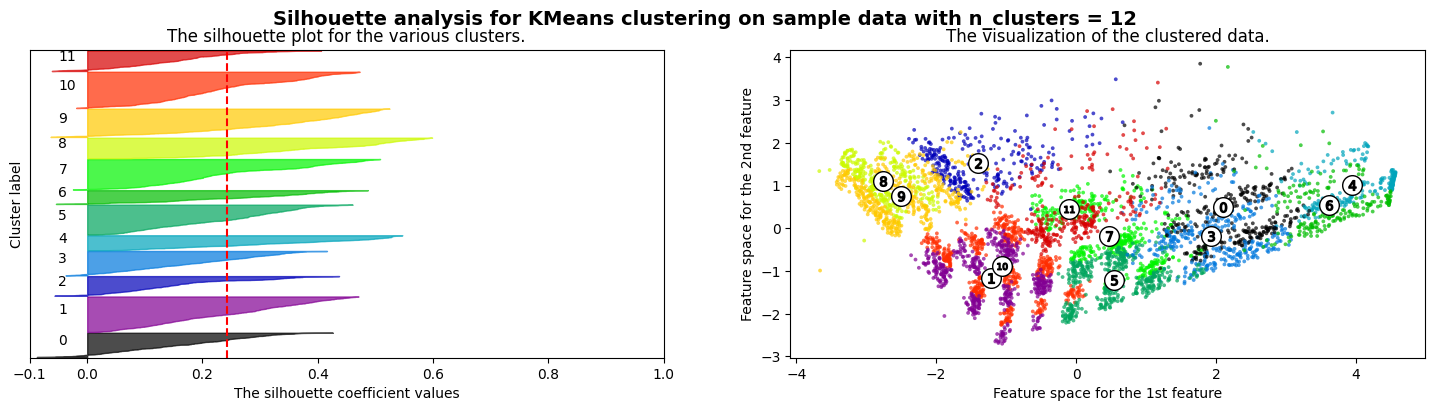

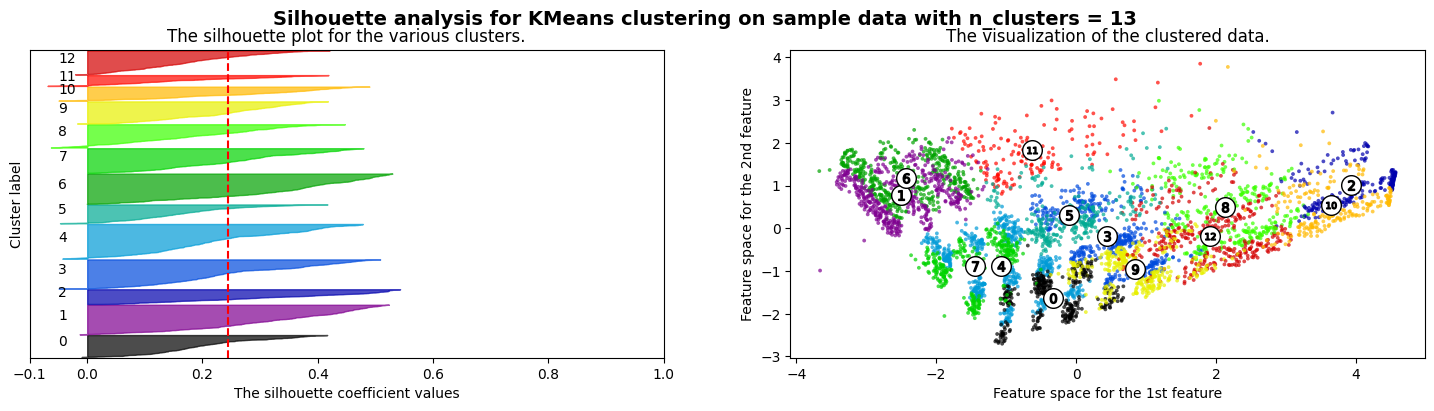

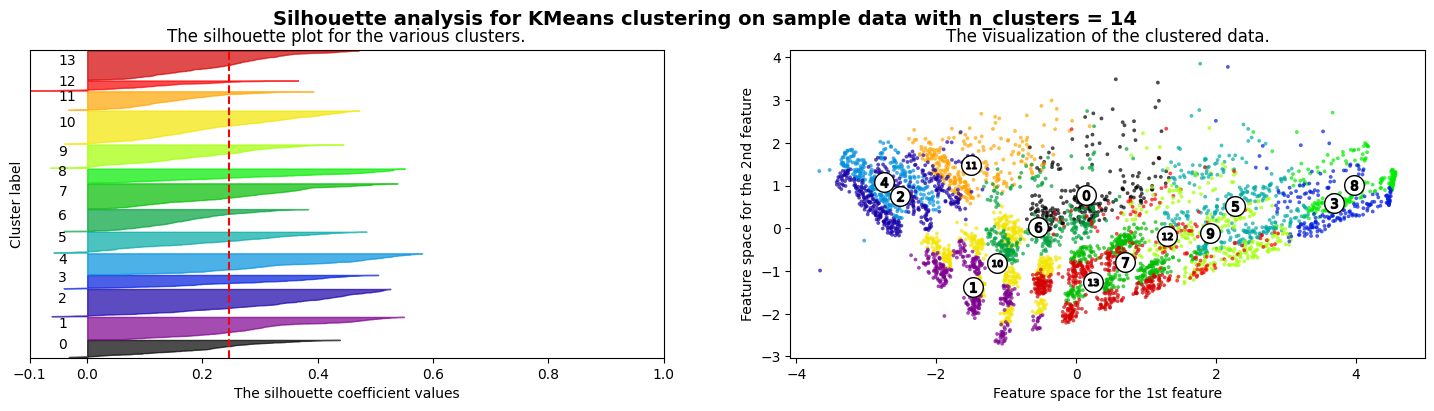

In [68]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), RFMS_final_pca, random_state)

we can analyse that based on the silhouette above, we pick the `n_cluster=4` due to the thickness distribution fairly enough for the data to be clustered. 

# ***Model Preparation***

this section includes the `Model: Definition, Training, and Evaluation`. by any means that the Feature Engineering has worked successfully then we would like to put it into a model. 

##### ***Definition and Training***

In [69]:
# Define the model by using KMeans and picked 4 clusters based on the Feature Engineering above
model_km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

# Train the model that is to be implemented based on the defined model above
pred = model_km.fit_predict(RFMS_final_pca)
pred

array([0, 1, 3, ..., 2, 1, 3])

In [70]:
# Insert clustering result into original dataset

RFMScore['cluster'] = pred
RFMScore

customer_id  Recency  Frequency  Monetary  R  F  M  RFMValue  RFMGroup  \
0         12346.0      -48          2      0.00  4  4  4        12       444   
1         12347.0     -371        182   4310.00  1  1  1         3       111   
2         12348.0     -298         31   1797.24  3  3  1         7       331   
3         12349.0     -355         73   1757.55  2  2  1         5       221   
4         12350.0      -63         17    334.40  4  4  3        11       443   
...           ...      ...        ...       ... .. .. ..       ...       ...   
4367      18280.0      -96         10    180.60  4  4  4        12       444   
4368      18281.0     -193          7     80.82  4  4  4        12       444   
4369      18282.0     -366         13    176.60  1  4  4         9       144   
4370      18283.0     -370        721   2045.53  1  1  1         3       111   
4371      18287.0     -331         70   1837.28  2  2  1         5       221   

     Customer_Level  cluster  
0            Silver        0  
1          Platinum        1  
2           Diamond        3  
3          Platinum        3  
4            Silver        0  
...             ...      ...  
4367         Silver        0  
4368         Silver        0  
4369           Gold        2  
4370       Platinum        1  
4371       Platinum        3  

[4372 rows x 11 columns]

In [71]:
# Call the DataFrame again to make sure it worked.
RFMScore

customer_id  Recency  Frequency  Monetary  R  F  M  RFMValue  RFMGroup  \
0         12346.0      -48          2      0.00  4  4  4        12       444   
1         12347.0     -371        182   4310.00  1  1  1         3       111   
2         12348.0     -298         31   1797.24  3  3  1         7       331   
3         12349.0     -355         73   1757.55  2  2  1         5       221   
4         12350.0      -63         17    334.40  4  4  3        11       443   
...           ...      ...        ...       ... .. .. ..       ...       ...   
4367      18280.0      -96         10    180.60  4  4  4        12       444   
4368      18281.0     -193          7     80.82  4  4  4        12       444   
4369      18282.0     -366         13    176.60  1  4  4         9       144   
4370      18283.0     -370        721   2045.53  1  1  1         3       111   
4371      18287.0     -331         70   1837.28  2  2  1         5       221   

     Customer_Level  cluster  
0            Silver        0  
1          Platinum        1  
2           Diamond        3  
3          Platinum        3  
4            Silver        0  
...             ...      ...  
4367         Silver        0  
4368         Silver        0  
4369           Gold        2  
4370       Platinum        1  
4371       Platinum        3  

[4372 rows x 11 columns]

##### ***Evaluation***

In this section, the model evaluation takes the form of a detailed visualisation of the clustering after implementing the model described above. Furthermore, this section is an exploratory clustering analysis (ECA) after being tailored with the model using the K-Means Algorithm because we concentrated on numerical data to establish each cluster's features.   


<Axes: >

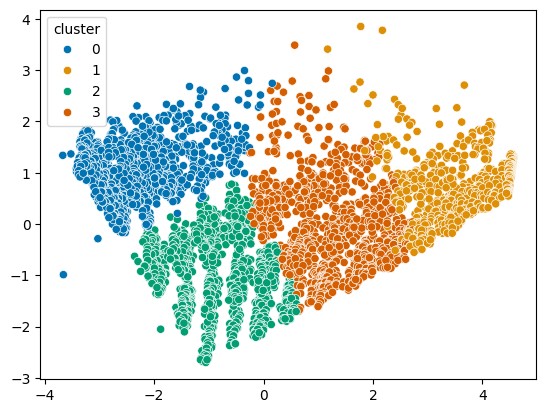

In [72]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(RFMS_scaled)

RFMS_scaled_2d = pca_2d.fit_transform(RFMS_scaled)

sns.scatterplot(x=RFMS_scaled_2d[:,0], y=RFMS_scaled_2d[:,1], hue=RFMScore['cluster'], palette='colorblind')

Now we can see the four clusters that were evenly distributed from the silhouette selection that we made above. This graph is about to begin the investigation of clustering analysis based on the dataset. 

##### ***Exploratory Clustering Analysis (ECA // EDA after clustering)***

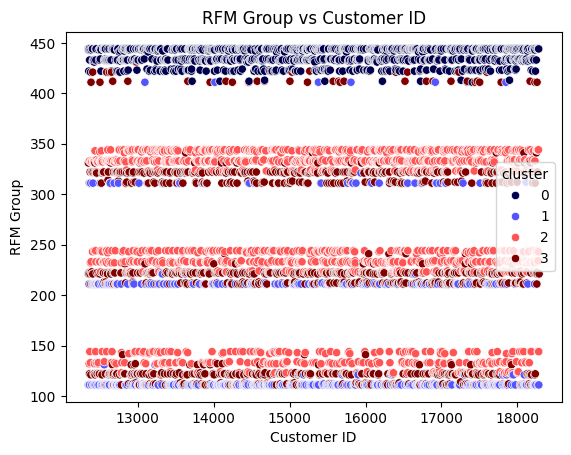

In [73]:
fig, ax = plt.subplots()
ax.set_title('RFM Group vs Customer ID')
ax.set_xlabel('Customer ID')
ax.set_ylabel('RFM Group')
sns.scatterplot(data=RFMScore, x='customer_id',y='RFMGroup', hue='cluster', ax=ax, palette='seismic')
plt.show()

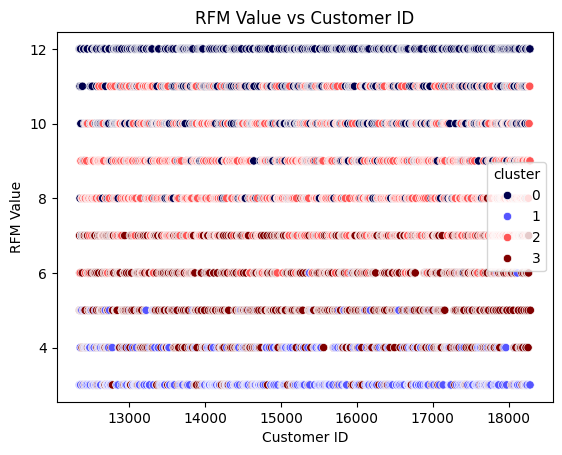

In [78]:
# Visualise the RFM Value based on Customer ID
fig, ax = plt.subplots()
ax.set_title('RFM Value vs Customer ID')
ax.set_xlabel('Customer ID')
ax.set_ylabel('RFM Value')
sns.scatterplot(data=RFMScore, x='customer_id',y='RFMValue', hue='cluster', ax=ax, palette='seismic')
plt.show()

as we can see the scatter plot above, we can analyse each characteristics of the clusters below: 
- *Cluster 0 (Dark Blue colour)*
  - Location: Seen consistently across different levels of RFM value, with a high concentration at higher values.
  - Attributes: Customers in this cluster tend to have high RFM values, indicating that they frequently transact with high transaction values and have recently made purchases.
  
- *Cluster 1 (Light Blue Colour)*
  - Location: Spread across different levels of RFM value, with a slight concentration in lower RFM values.
  - Traits: These customers have varying RFM values, but tend to have lower values, suggesting they may not transact very often or their transaction value is lower.
  
- *Cluster 2 (Pink Colour)*
  - Location: Also spread across different levels of RFM value, with a concentration in lower values.
  - Traits: Customers in this cluster tend to have lower RFM values, possibly indicating lower transaction frequency and value and poor recency.
  
- *Cluster 3 (Dark Red Colour)*
  - Location: Seen almost exclusively at lower RFM values.
  - Traits: These are the customers with the lowest RFM values, indicating that they transact very infrequently, have low transaction value, and have not transacted for a long time.

Translated with DeepL.com (free version)

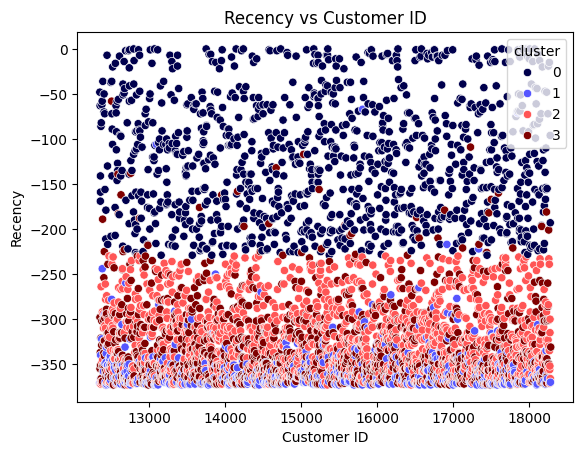

In [77]:
# Visualise the Recency based on Customer ID
fig, ax = plt.subplots()
ax.set_title('Recency vs Customer ID')
ax.set_xlabel('Customer ID')
ax.set_ylabel('Recency')
sns.scatterplot(data=RFMScore, x='customer_id',y='Recency', hue='cluster', ax=ax, palette='seismic')
plt.show()

 Based on the scatter plot above we can depict each characteristics of the clusters below:  
- *Cluster 0 (Dark Blue Colour)*
  - Location: Mostly at the top of the graph, with higher recency values (less negative).
  - Traits: Customers in this cluster tend to be more recent, meaning they have made more recent transactions than customers in other clusters.
  
- *Cluster 1 (Light Blue colour)*
  - Location: Scattered throughout the graph, but slightly more focused at the bottom.
  - Attributes: These customers have a wider variety of transaction times, but most tend to have lower (more negative) recency, indicating that they are older customers.
  
- *Cluster 2 (Pink Colour)*
  - Location: Most are at the bottom of the graph, indicating lower (more negative) recency values.
  - Attributes: Customers in this cluster are older customers who may no longer be active or transact infrequently.
  
- *Cluster 3 (Dark Red Colour)*
  - Location: Almost entirely at the bottom of the graph, with very low (very negative) recency.
  - Attributes: These are the customers who have not transacted for the longest time, probably inactive.

# ***Model Inference***

The inference will be conducted in another notebook that focus on the Model Inference 

# ***Model Saving*** 

In [76]:
# save the files ! 
with open('model_scaler.pkl', 'wb') as file_1 : # wb = write binary
    pickle.dump(model_scaler,file_1)
    
with open('model_pca.pkl', 'wb') as file_2 : # wb = write binary
    pickle.dump(model_pca,file_2)
    
with open('model_km.pkl', 'wb') as file_3 : # wb = write binary
    pickle.dump(model_km,file_3)

# ***Conclusion & Recommendation***

we can conclude for each characteristics of the clusters below:
1. *Cluster 0*: New customers who transact frequently with high value.
2. *Cluster 1*: Customers with variations in transactions but tend to have lower transaction frequency and value.
3. *Cluster 2*: Existing customers who transact infrequently with low transaction value.
4. *Cluster 3*: Customers who have not transacted for a very long time, with very low transaction frequency and value.

`Recommendations`
With this analysis, we can determine different strategies for each cluster, such as increasing retention for cluster 0, reactivating clusters 2 and 3, or increasing transaction value for cluster 1.